In [1]:
from notebook_utils import *
import seaborn as sns

In [2]:
experiments_ids = [BitflipExperimentID.IPMA, BitflipExperimentID.CXH, BitflipExperimentID.IPMA2, PhaseflipExperimentID.IPMA, GHZExperimentID.EMBED, ResetExperimentID.main]

# POMDPs Sizes

In [3]:
df = get_all_experiments_attr(experiments_ids, EXPAttr.POMDP_SIZE)

df

,experiment,pomdp_size
0,bitflip-ipma,33
1,bitflip-ipma,33
2,bitflip-ipma,33
3,bitflip-ipma,33
4,bitflip-ipma,33
...,...,...
2184,reset-main,4
2185,reset-main,4
2186,reset-main,4
2187,reset-main,4


In [4]:
# Count entries with the same experiment
experiment_counts = df['experiment'].value_counts()
experiment_counts

experiment
ghz-embed         1275
bitflip-ipma       225
bitflip-cxh        225
bitflip-ipma2      225
reset-main         156
phaseflip-ipma      83
Name: count, dtype: int64

In [6]:
num_states_counts = df.groupby('experiment')["pomdp_size"].unique()
num_states_counts

experiment
bitflip-cxh              [353]
bitflip-ipma              [33]
bitflip-ipma2             [17]
ghz-embed         [57, 51, 38]
phaseflip-ipma            [17]
reset-main                 [4]
Name: pomdp_size, dtype: object

# POMDPs Times

In [7]:
df = get_all_experiments_attr(experiments_ids, EXPAttr.POMDP_TIME)

df

,experiment,pomdp_time
0,bitflip-ipma,0.233298
1,bitflip-ipma,0.248221
2,bitflip-ipma,0.233453
3,bitflip-ipma,0.242683
4,bitflip-ipma,0.246514
...,...,...
2184,reset-main,0.001166
2185,reset-main,0.001129
2186,reset-main,0.001152
2187,reset-main,0.000750


In [5]:
df.groupby("experiment")["pomdp_time"].agg(["mean", "min", "max"]).reset_index()

,experiment,mean,min,max
0,bitflip-cxh,12.206964,9.583621,27.608212
1,bitflip-ipma,0.340987,0.255240,1.179058
2,bitflip-ipma2,0.425825,0.329371,1.025690
3,ghz-embed,0.924752,0.384006,2.300086
4,phaseflip-ipma,11.571594,0.812483,32.698146
5,reset-main,0.000788,0.000645,0.001593


# Bellman Times

In [11]:
df = get_all_experiments_attr([BitflipExperimentID.IPMA, BitflipExperimentID.IPMA2, BitflipExperimentID.CXH, PhaseflipExperimentID.IPMA, GHZExperimentID.EMBED, ResetExperimentID.main], EXPAttr.BELLMAN_TIME)
df

,experiment,horizon,bellman_time
0,bitflip-ipma,4,15.0
1,bitflip-ipma,5,69.0
2,bitflip-ipma,6,305.0
3,bitflip-ipma,7,1328.0
4,bitflip-ipma,4,15.0
...,...,...,...
6162,reset-main,3,0.0
6163,reset-main,4,1.0
6164,reset-main,5,2.0
6165,reset-main,6,7.0


<Axes: xlabel='horizon', ylabel='bellman_time'>

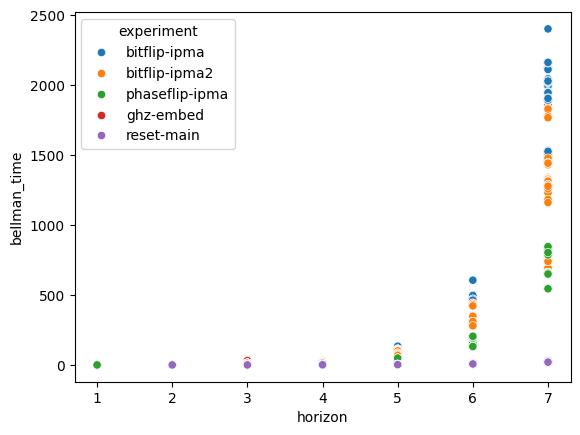

In [10]:
sns.scatterplot(df, x="horizon", y="bellman_time", hue="experiment")

In [16]:
df_to_save = df.groupby(["experiment", "horizon"])["bellman_time"].agg(["mean", "min", "max"]).reset_index()

path_results = os.path.join(get_project_path(), "results", "bellman_times.csv")
df_to_save.to_csv(path_results)
df_to_save

,experiment,horizon,mean,min,max
0,bitflip-cxh,4,33.720000,28.0,45.0
1,bitflip-cxh,5,179.426667,150.0,217.0
2,bitflip-cxh,6,922.595556,780.0,1115.0
3,bitflip-cxh,7,4659.088889,3937.0,5621.0
4,bitflip-ipma,4,19.142222,15.0,29.0
5,bitflip-ipma,5,86.431111,68.0,134.0
6,bitflip-ipma,6,381.866667,304.0,606.0
7,bitflip-ipma,7,1661.320000,1325.0,2403.0
8,bitflip-ipma2,1,0.111111,0.0,1.0
9,bitflip-ipma2,2,0.577778,0.0,2.0
